![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)
# Intro to Regression with Tensorflow & Keras

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [2]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [3]:
df = pd.DataFrame(X)
target_df = pd.DataFrame(y, columns=['price'])

cali_df = pd.concat([df, target_df], axis=1)


In [4]:
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
target_df.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:
cali_df.head()

,0,1,2,3,4,5,6,7,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [25]:
yy = cali_df.price
XX = cali_df.drop(columns=['price', 0, 1, 2, 3])
X_train, X_test,y_train, y_test = train_test_split(XX, yy, random_state = 42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a relu activation for the hidden layer.

In [26]:
n_input = X_train_scaled.shape[1]

In [27]:
model_1 = Sequential()
model_1.add(Dense(24, activation ='relu'))
model_1.add(Dense(1))

### Part 3 - continued

Set up the compilation of the network.  Use an adam optimizer and appropriate loss function with the mean squared error metric.

In [28]:
model_1.compile(loss = 'mean_absolute_error', optimizer='adam', metrics = ['mse'])

### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [29]:
history = model_1.fit(
    X_train, 
    y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    verbose = 0
)

### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

No handles with labels found to put in legend.


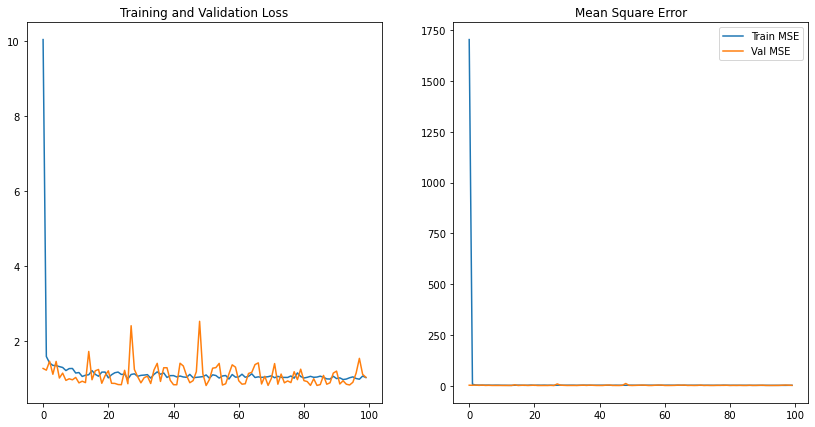

In [12]:
fig, axes = plt.subplots(1,2, figsize = (14, 7))
axes[0].plot(history.history['loss'], label = 'Train Loss')
axes[0].plot(history.history['val_loss'], label = 'Val Loss')
axes[0].set_title('Training and Validation Loss')
plt.legend()

axes[1].plot(history.history['mse'], label = 'Train MSE')
axes[1].plot(history.history['val_mse'], label = 'Val MSE')
axes[1].set_title('Mean Square Error');
plt.legend();

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `relu` activation function.

In [13]:
model = Sequential()
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

In [14]:
yy = cali_df.price
XX = cali_df.drop(columns=['price'])
X_train, X_test,y_train, y_test = train_test_split(XX, yy, random_state = 42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [15]:
model.compile(loss = 'mean_absolute_error', optimizer='adam', metrics = ['mse'])

In [16]:
history = model.fit(
    X_train_scaled, 
    y_train,
    validation_data = (X_test_scaled, y_test),
    epochs = 100,
    verbose = 0
)

No handles with labels found to put in legend.


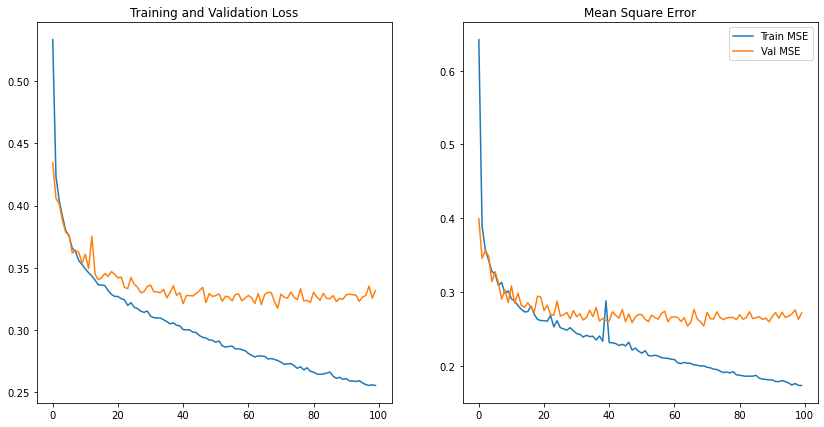

In [17]:
fig, axes = plt.subplots(1,2, figsize = (14, 7))
axes[0].plot(history.history['loss'], label = 'Train Loss')
axes[0].plot(history.history['val_loss'], label = 'Val Loss')
axes[0].set_title('Training and Validation Loss')
plt.legend()

axes[1].plot(history.history['mse'], label = 'Train MSE')
axes[1].plot(history.history['val_mse'], label = 'Val MSE')
axes[1].set_title('Mean Square Error');
plt.legend();

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

##### Does this change anything?

In [18]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_absolute_error', optimizer='adam', metrics = ['mse'])

history = model.fit(
    X_train_scaled, 
    y_train,
    validation_data = (X_test_scaled, y_test),
    epochs = 100,
    verbose = 0)

No handles with labels found to put in legend.


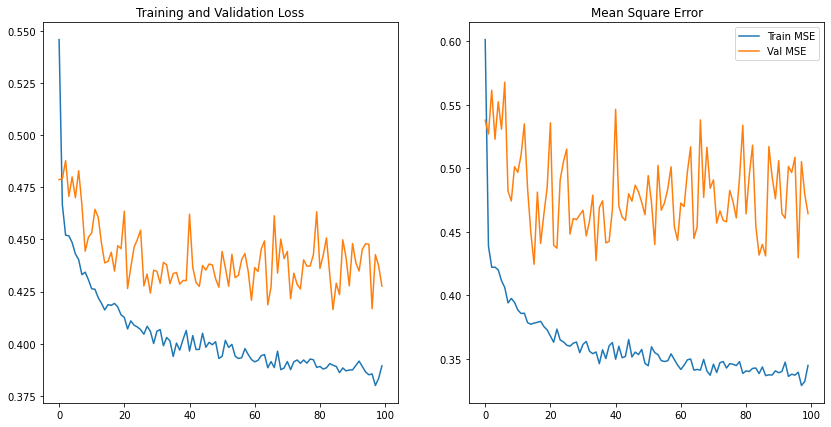

In [19]:
fig, axes = plt.subplots(1,2, figsize = (14, 7))
axes[0].plot(history.history['loss'], label = 'Train Loss')
axes[0].plot(history.history['val_loss'], label = 'Val Loss')
axes[0].set_title('Training and Validation Loss')
plt.legend()

axes[1].plot(history.history['mse'], label = 'Train MSE')
axes[1].plot(history.history['val_mse'], label = 'Val MSE')
axes[1].set_title('Mean Square Error');
plt.legend();

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)


In [21]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_absolute_error', optimizer='adam', metrics = ['mse'])

history = model.fit(
    X_train_scaled, 
    y_train,
    validation_data = (X_test_scaled, y_test),
    epochs = 100,
    verbose = 0, 
    callbacks = [early_stop])

No handles with labels found to put in legend.


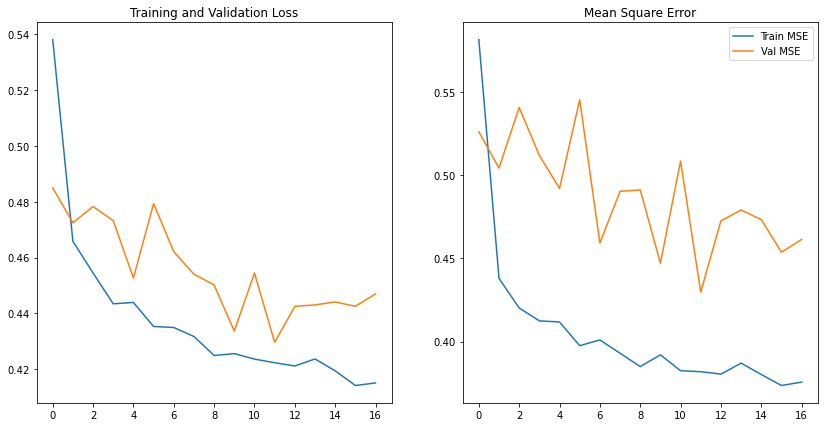

In [22]:
fig, axes = plt.subplots(1,2, figsize = (14, 7))
axes[0].plot(history.history['loss'], label = 'Train Loss')
axes[0].plot(history.history['val_loss'], label = 'Val Loss')
axes[0].set_title('Training and Validation Loss')
plt.legend()

axes[1].plot(history.history['mse'], label = 'Train MSE')
axes[1].plot(history.history['val_mse'], label = 'Val MSE')
axes[1].set_title('Mean Square Error');
plt.legend();

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [32]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.05))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_absolute_error', optimizer='adam', metrics = ['mse'])

history = model.fit(
    X_train_scaled, 
    y_train,
    validation_data = (X_test_scaled, y_test),
    epochs = 100,
    verbose = 0, 
    callbacks = [early_stop])

No handles with labels found to put in legend.


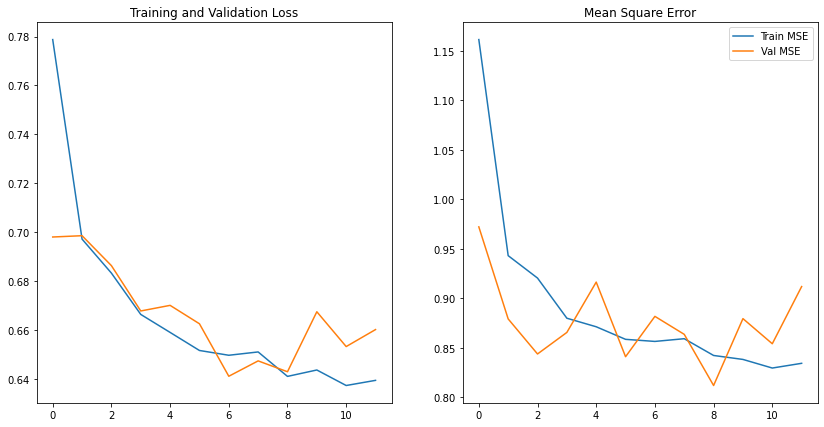

In [33]:
fig, axes = plt.subplots(1,2, figsize = (14, 7))
axes[0].plot(history.history['loss'], label = 'Train Loss')
axes[0].plot(history.history['val_loss'], label = 'Val Loss')
axes[0].set_title('Training and Validation Loss')
plt.legend()

axes[1].plot(history.history['mse'], label = 'Train MSE')
axes[1].plot(history.history['val_mse'], label = 'Val MSE')
axes[1].set_title('Mean Square Error');
plt.legend();

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [42]:
# Evaluate model on test data. # THIS WAS OUR BASELINE MODEL 
score_1 = model_1.evaluate(X_test_scaled,
                       y_test,
                       verbose=1)

labels_1 = model_1.metrics_names
# Show model performance.
print(f'{labels_1[0]}: {score_1[0]}')
print(f'{labels_1[1]}: {score_1[1]}')

162/162 [==============================] - 0s 895us/step - loss: 2.5290 - mse: 7.6616
loss: 2.529003858566284
mse: 7.661623954772949


In [43]:
# Evaluate model on test data.
score = model.evaluate(X_test_scaled,
                       y_test,
                       verbose=1)

labels = model.metrics_names
# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

162/162 [==============================] - 0s 603us/step - loss: 0.6603 - mse: 0.9120
loss: 0.6603237390518188
mse: 0.9119690656661987


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [37]:
model_l2 = Sequential()
model_l2.add(BatchNormalization())
model_l2.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.01)))
model_l2.add(Dropout(0.05))
model_l2.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model_l2.add(Dropout(0.2))
model_l2.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.01)))
model_l2.add(Dense(1, kernel_regularizer=l2(0.01)))

model_l2.compile(loss = 'mean_absolute_error', optimizer='adam', metrics = ['mse'])

history = model_l2.fit(
    X_train_scaled, 
    y_train,
    validation_data = (X_test_scaled, y_test),
    epochs = 100,
    verbose = 0, 
    callbacks = [early_stop])

In [44]:
# Evaluate model on test data.
score = model_l2.evaluate(X_test_scaled,
                       y_test,
                       verbose=1)

labels = model_l2.metrics_names
# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

162/162 [==============================] - 0s 690us/step - loss: 0.7456 - mse: 0.9065
loss: 0.7456144690513611
mse: 0.9065414667129517


the rmse is lower than the baseline here.

### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [49]:
model_l2.save('cali_housing.h5')